In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import riskfolio as rp

print("All libraries imported successfully!")


All libraries imported successfully!


In [2]:
tickers = ['SPY', 'TLT']
start_date = '2018-01-01'
end_date = '2024-01-01'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.head()


[*********************100%***********************]  2 of 2 completed


Ticker,SPY,TLT
Date,,
2018-01-02 00:00:00+00:00,240.801498,106.180069
2018-01-03 00:00:00+00:00,242.324661,106.687744
2018-01-04 00:00:00+00:00,243.346054,106.670830
2018-01-05 00:00:00+00:00,244.967575,106.366241
2018-01-08 00:00:00+00:00,245.415665,106.298515


In [3]:
returns = data.pct_change().dropna()
returns.head()


Ticker,SPY,TLT
Date,,
2018-01-03 00:00:00+00:00,0.006325,0.004781
2018-01-04 00:00:00+00:00,0.004215,-0.000159
2018-01-05 00:00:00+00:00,0.006663,-0.002855
2018-01-08 00:00:00+00:00,0.001829,-0.000637
2018-01-09 00:00:00+00:00,0.002263,-0.013373


In [5]:
# Initialize the portfolio object
port = rp.Portfolio(returns=returns)

# Estimate the mean and covariance matrix
port.assets_stats(method_mu='hist', method_cov='hist')

# Perform risk parity optimization
w_rp = port.rp_optimization(model='Classic', rm='MV', hist=True, rf=0, b=None)

print("Risk Parity Portfolio Weights:")
print(w_rp.T)


Risk Parity Portfolio Weights:
              SPY       TLT
weights  0.447891  0.552109


In [6]:
w_6040 = pd.DataFrame([0.6, 0.4], index=['SPY', 'TLT'], columns=['Weight'])

print("60/40 Equity-Bond Portfolio Weights:")
print(w_6040.T)


60/40 Equity-Bond Portfolio Weights:
        SPY  TLT
Weight  0.6  0.4


In [10]:
print(rp_cumulative_returns.index)


Index([2018-01-03 00:00:00+00:00, 2018-01-04 00:00:00+00:00,
       2018-01-05 00:00:00+00:00, 2018-01-08 00:00:00+00:00,
       2018-01-09 00:00:00+00:00, 2018-01-10 00:00:00+00:00,
       2018-01-11 00:00:00+00:00, 2018-01-12 00:00:00+00:00,
       2018-01-16 00:00:00+00:00, 2018-01-17 00:00:00+00:00,
       ...
       2023-12-18 00:00:00+00:00, 2023-12-19 00:00:00+00:00,
       2023-12-20 00:00:00+00:00, 2023-12-21 00:00:00+00:00,
       2023-12-22 00:00:00+00:00, 2023-12-26 00:00:00+00:00,
       2023-12-27 00:00:00+00:00, 2023-12-28 00:00:00+00:00,
       2023-12-29 00:00:00+00:00,                 'weights'],
      dtype='object', length=1509)


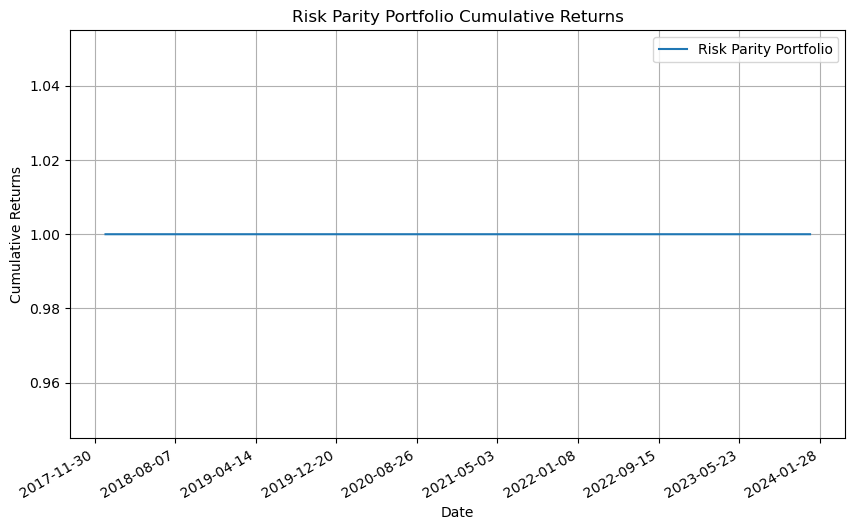

In [11]:
# Remove the non-date entry from the index
rp_cumulative_returns = rp_cumulative_returns.drop('weights', errors='ignore')

# Ensure the index is in datetime format
rp_cumulative_returns.index = pd.to_datetime(rp_cumulative_returns.index, errors='coerce')

# Drop any rows with NaT in the index
rp_cumulative_returns = rp_cumulative_returns.dropna()

# Plot cumulative returns with cleaned x-axis
plt.figure(figsize=(10, 6))
plt.plot(rp_cumulative_returns, label='Risk Parity Portfolio')
plt.title('Risk Parity Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)

# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.gcf().autofmt_xdate()

plt.show()


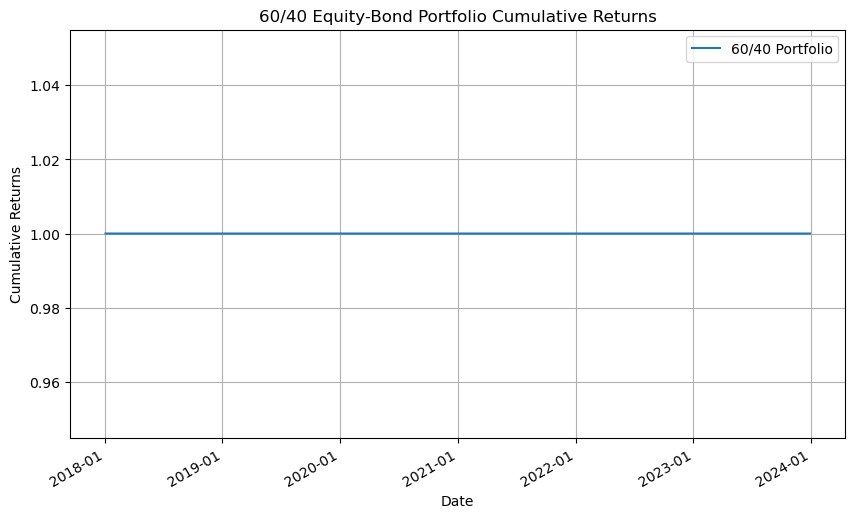

In [26]:
import matplotlib.dates as mdates

# Ensure the index is in datetime format and remove timezone information
cumulative_returns_6040.index = pd.to_datetime(cumulative_returns_6040.index, errors='coerce').tz_localize(None)
cumulative_returns_6040.dropna(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns_6040, label='60/40 Portfolio')
plt.title('60/40 Equity-Bond Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)

# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.show()


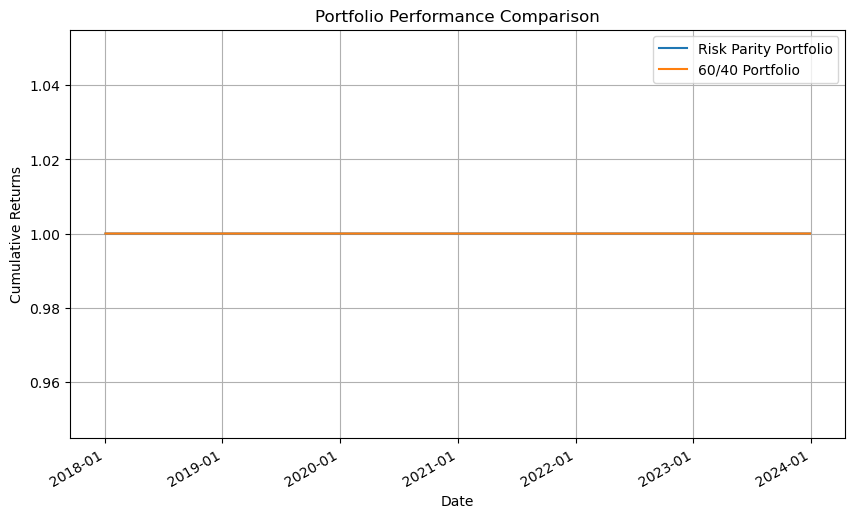

In [27]:
# Ensure the index is in datetime format and remove timezone information
rp_cumulative_returns.index = pd.to_datetime(rp_cumulative_returns.index, errors='coerce').tz_localize(None)
rp_cumulative_returns.dropna(inplace=True)

cumulative_returns = pd.DataFrame({
    'Risk Parity': rp_cumulative_returns,
    '60/40 Portfolio': cumulative_returns_6040
})

plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns['Risk Parity'], label='Risk Parity Portfolio')
plt.plot(cumulative_returns['60/40 Portfolio'], label='60/40 Portfolio')
plt.title('Portfolio Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)

# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.show()


In [28]:
rp_cumulative_returns = (1 + returns.dot(w_rp)).cumprod()
rp_cumulative_returns.dropna(inplace=True)


In [29]:
final_returns = cumulative_returns.iloc[-1]
print("Final Cumulative Returns:")
print(final_returns)

annualized_returns = cumulative_returns.pct_change(fill_method=None).mean() * 252
annualized_volatility = cumulative_returns.pct_change(fill_method=None).std() * np.sqrt(252)

print("\nAnnualized Returns:")
print(annualized_returns)

print("\nAnnualized Volatility:")
print(annualized_volatility)


Final Cumulative Returns:
Risk Parity        NaN
60/40 Portfolio    1.0
Name: NaT, dtype: float64

Annualized Returns:
Risk Parity        0.0
60/40 Portfolio    0.0
dtype: float64

Annualized Volatility:
Risk Parity        0.0
60/40 Portfolio    0.0
dtype: float64
